<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/2.1%20DBSCAN%20from%20Scratch/DBSCAN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from collections import deque
from sklearn.metrics import pairwise_distances

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        """
        Initialize the DBSCAN instance.
        :param eps: Maximum distance between two points for them to be considered neighbors.
        :param min_samples: Minimum number of neighbors required to form a core point.
        """
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        """
        Perform DBSCAN clustering from features or distance matrix.
        :param X: Input dataset (n_samples, n_features).
        :return: Cluster labels (-1 for noise).
        """
        # Initialize variables
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1)  # Initialize all points as noise (-1)
        cluster_id = 0
        visited = np.zeros(n_samples, dtype=bool)  # Tracks visited points

        # Iterate over each point
        for point_idx in range(n_samples):
            if visited[point_idx]:
                continue
            visited[point_idx] = True
            neighbors = self._region_query(X, point_idx)

            # If the point is not a core point, continue
            if len(neighbors) < self.min_samples:
                labels[point_idx] = -1  # Mark as noise
            else:
                # Expand the cluster
                self._expand_cluster(X, labels, point_idx, neighbors, cluster_id, visited)
                cluster_id += 1  # Increment cluster ID for the next cluster

        self.labels_ = labels
        return self

    def _region_query(self, X, point_idx):
        """
        Find all points within eps distance of a given point.
        :param X: Input dataset.
        :param point_idx: Index of the query point.
        :return: List of neighboring point indices.
        """
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, labels, point_idx, neighbors, cluster_id, visited):
        """
        Expand a new cluster from the core point.
        :param X: Input dataset.
        :param labels: Cluster labels.
        :param point_idx: Index of the starting core point.
        :param neighbors: Neighboring points of the starting core point.
        :param cluster_id: Current cluster ID.
        :param visited: Array tracking visited points.
        """
        queue = deque(neighbors)
        labels[point_idx] = cluster_id  # Assign cluster ID

        while queue:
            current_point = queue.popleft()
            if not visited[current_point]:
                visited[current_point] = True
                current_neighbors = self._region_query(X, current_point)

                # If it's a core point, add its neighbors to the queue
                if len(current_neighbors) >= self.min_samples:
                    queue.extend(current_neighbors)

            # Assign the cluster ID to border points if they are unvisited
            if labels[current_point] == -1:
                labels[current_point] = cluster_id


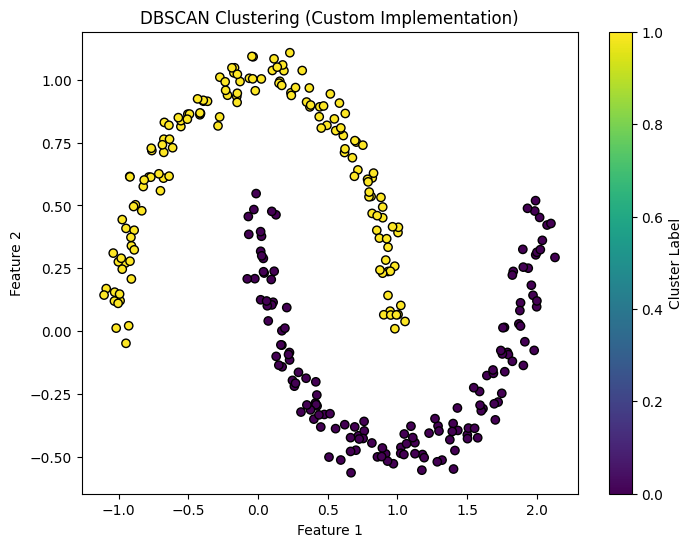

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate a dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Plot the results
labels = dbscan.labels_
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering (Custom Implementation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()
